In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
import os

In [4]:
# DIR = "../multirun/2020-06-07/20-51-14/"
# DIR = "/home/ira/code/projects/rl_trickery/multirun/2020-06-08/21-48-14/"
DIR = "/home/ira/code/projects/rl_trickery/runs/2020.06.09/"

# DIR = "/home/ira/code/projects/rl_trickery/multirun/0_saved_experiments/low_recurse_depth_maze_13/"

In [5]:
runs = sorted(os.listdir(DIR))
runs

['000456_agent.network.recurse_depth=1,agent=a2c_crnn',
 '022554_agent.network.recurse_depth=2,agent=a2c_crnn',
 '050801_agent=a2c_2am',
 '065753_agent.long_horizon=true,agent=a2c_2am',
 '220420_agent.network.recurse_depth=0,agent=a2c_crnn']

In [6]:
dfs = {}
for run in runs:
    f_eval = DIR + run + "/eval.csv"
    f_train = DIR + run + "/train.csv"    
    df_run = pd.read_csv(f_train)
    dfs[run] = df_run

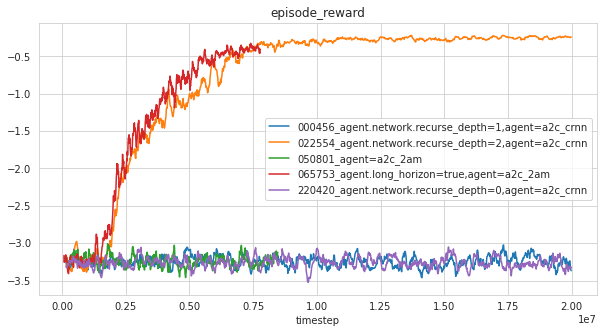

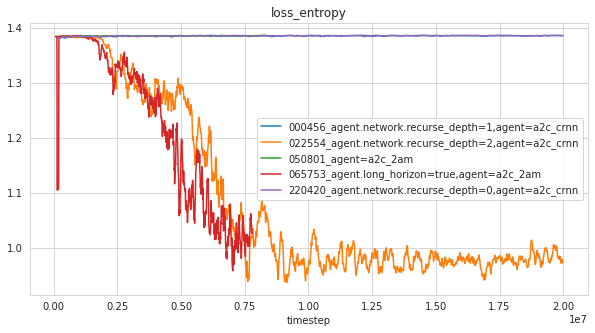

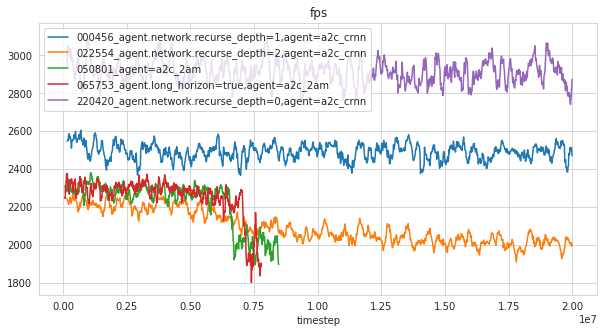

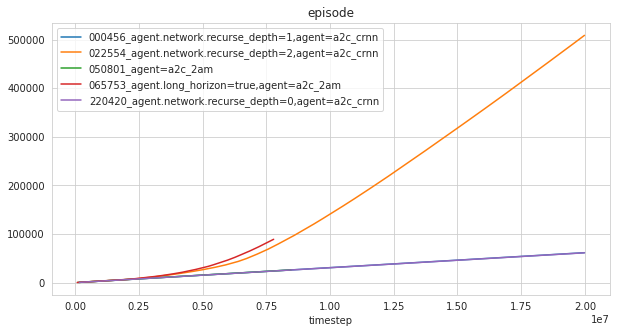

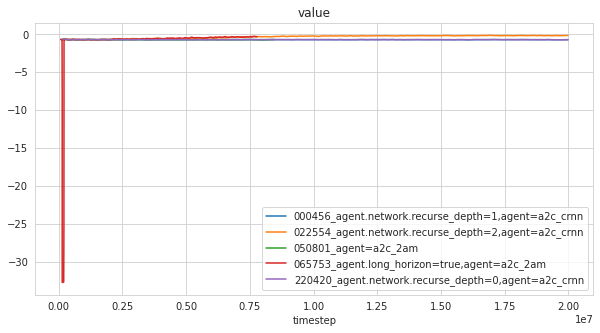

In [7]:
ax = None

target_vars = [
    "episode_reward",
    "loss_entropy",
    "fps",
    "episode",
    "value",
]

for target_var in target_vars:
    ax = None
    for key, df in dfs.items():
        df = df.set_index("timestep")[target_var]
        df = df.rolling(10).mean()
        ax = df.reset_index().plot(x="timestep", y=target_var, label=key, ax=ax, figsize=(10,5))
    plt.title(target_var)